# Predict Future Price

---

### Import Libraries and Dependencies

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import datetime as dt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

import talib

### Read CSV / API into Pandas DataFrame

In [2]:
# Loading data
file_path = Path("Resources/Yahoo Finance/All Yahoo Data.csv")
All_Yahoo_Data = pd.read_csv(file_path)
All_Yahoo_Data.head()

df = All_Yahoo_Data.loc[All_Yahoo_Data['Ticker'] == 'Gold']
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Ticker
19080,2010-01-04,41.180000,40.250000,40.700001,40.389999,14212200.0,35.226242,Gold
19081,2010-01-05,41.099998,40.040001,40.660000,40.889999,13018600.0,35.662300,Gold
19082,2010-01-06,42.340000,41.139999,41.320000,41.759998,12329200.0,36.421078,Gold
19083,2010-01-07,41.669998,40.889999,41.669998,41.169998,9291000.0,35.906513,Gold
19084,2010-01-08,41.669998,40.700001,41.599998,41.430000,9198600.0,36.133278,Gold


### Get data directly from Yahoo from Yahoo Finance API

### Preparing Data

In [3]:
df = df.drop(["Adj Close", "Ticker"], axis=1)

stock_high = df['High']
stock_low = df['Low']
stock_open = df['Open']
stock_close = df['Close']
stock_volume = df['Volume']

### Calculate trading signals

In [4]:
# Calculate daily return
df['Returns'] = df['Close'].pct_change()

# Create Target column
df['Target'] = np.where(df['Returns'] >= 0, 1.0, -1)

In [5]:
# MACD, MACD Histogram
df['MACD'], df['MSIG'], macdhist = talib.MACD(stock_close, fastperiod=12, slowperiod=26, signalperiod=9)
df.tail()

,Date,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG
21591,2019-12-24,18.320000,17.760000,17.799999,18.309999,8174000.0,0.030968,1.0,0.264209,0.179156
21592,2019-12-26,18.559999,18.200001,18.500000,18.360001,9372500.0,0.002731,1.0,0.305427,0.204410
21593,2019-12-27,18.480000,18.180000,18.320000,18.370001,9047000.0,0.000545,1.0,0.335037,0.230536
21594,2019-12-30,18.680000,18.330000,18.410000,18.610001,9560900.0,0.013065,1.0,0.373563,0.259141
21595,2019-12-31,18.830000,18.500000,18.740000,18.590000,9210900.0,-0.001075,-1.0,0.397895,0.286892


In [6]:
# Compute Average Directional Index (ADX)
df['ADX'] = talib.ADX(stock_high, stock_low, stock_close, timeperiod=14)
df.tail()

,Date,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX
21591,2019-12-24,18.320000,17.760000,17.799999,18.309999,8174000.0,0.030968,1.0,0.264209,0.179156,24.695582
21592,2019-12-26,18.559999,18.200001,18.500000,18.360001,9372500.0,0.002731,1.0,0.305427,0.204410,26.586708
21593,2019-12-27,18.480000,18.180000,18.320000,18.370001,9047000.0,0.000545,1.0,0.335037,0.230536,28.261033
21594,2019-12-30,18.680000,18.330000,18.410000,18.610001,9560900.0,0.013065,1.0,0.373563,0.259141,30.084756
21595,2019-12-31,18.830000,18.500000,18.740000,18.590000,9210900.0,-0.001075,-1.0,0.397895,0.286892,31.967575


In [7]:
# Compute Relatie Strength Index (RSI)
df['RSI'] = talib.RSI(stock_close, timeperiod=14)
df.tail()

,Date,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX,RSI
21591,2019-12-24,18.320000,17.760000,17.799999,18.309999,8174000.0,0.030968,1.0,0.264209,0.179156,24.695582,65.469137
21592,2019-12-26,18.559999,18.200001,18.500000,18.360001,9372500.0,0.002731,1.0,0.305427,0.204410,26.586708,66.002350
21593,2019-12-27,18.480000,18.180000,18.320000,18.370001,9047000.0,0.000545,1.0,0.335037,0.230536,28.261033,66.115047
21594,2019-12-30,18.680000,18.330000,18.410000,18.610001,9560900.0,0.013065,1.0,0.373563,0.259141,30.084756,68.789032
21595,2019-12-31,18.830000,18.500000,18.740000,18.590000,9210900.0,-0.001075,-1.0,0.397895,0.286892,31.967575,68.305283


In [8]:
# Compute Bollinger Bands
df['BB Upper'], df['BB middle'], df['BB Lower'] = talib.BBANDS(stock_close, timeperiod=26)
df.tail()

,Date,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX,RSI,BB Upper,BB middle,BB Lower
21591,2019-12-24,18.320000,17.760000,17.799999,18.309999,8174000.0,0.030968,1.0,0.264209,0.179156,24.695582,65.469137,18.095553,17.185385,16.275216
21592,2019-12-26,18.559999,18.200001,18.500000,18.360001,9372500.0,0.002731,1.0,0.305427,0.204410,26.586708,66.002350,18.249128,17.241923,16.234718
21593,2019-12-27,18.480000,18.180000,18.320000,18.370001,9047000.0,0.000545,1.0,0.335037,0.230536,28.261033,66.115047,18.385516,17.292692,16.199869
21594,2019-12-30,18.680000,18.330000,18.410000,18.610001,9560900.0,0.013065,1.0,0.373563,0.259141,30.084756,68.789032,18.551498,17.355000,16.158502
21595,2019-12-31,18.830000,18.500000,18.740000,18.590000,9210900.0,-0.001075,-1.0,0.397895,0.286892,31.967575,68.305283,18.681043,17.430000,16.178957


In [9]:
# Compute Force Index
df['FI'] = df['Volume'] * (df['Close'] - df['Close'].shift(1)) # <<<<<<<<<<<<<<<<< VALIDATE THE RESULT IN DF, RESULT IN DF NOT MATCHING EXPECTED RESULT FROM THSI FORMULA !!
df['EFI'] = talib.EMA(df['FI'], timeperiod=13)

# Remove Scientific Notation from columns FI and EFI
pd.options.display.float_format = '{:.2f}'.format

df.tail()

In [10]:
# ------------ SMA 50 AND 200 DAYS ------------

# Calculate 50 day simple movering average
df['SMA 50'] = df['Close'].transform(lambda x: x.rolling(window = 50).mean())

# Calculate 200 day simple movering average
df['SMA 200'] = df['Close'].transform(lambda x: x.rolling(window = 200).mean())

# Calculate simple moving average ratio to capture the relationship between the two moving averages
df['SMA 200/50'] = df['SMA 200'] / df['SMA 50']
df.tail()

,Date,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,ADX,RSI,BB Upper,BB middle,BB Lower,SMA 50,SMA 200,SMA 200/50
21591,2019-12-24,18.320000,17.760000,17.799999,18.309999,8174000.0,0.030968,1.0,0.264209,0.179156,24.695582,65.469137,18.095553,17.185385,16.275216,16.9900,15.82995,0.931722
21592,2019-12-26,18.559999,18.200001,18.500000,18.360001,9372500.0,0.002731,1.0,0.305427,0.204410,26.586708,66.002350,18.249128,17.241923,16.234718,17.0240,15.85500,0.931332
21593,2019-12-27,18.480000,18.180000,18.320000,18.370001,9047000.0,0.000545,1.0,0.335037,0.230536,28.261033,66.115047,18.385516,17.292692,16.199869,17.0526,15.88130,0.931313
21594,2019-12-30,18.680000,18.330000,18.410000,18.610001,9560900.0,0.013065,1.0,0.373563,0.259141,30.084756,68.789032,18.551498,17.355000,16.158502,17.0830,15.90935,0.931297
21595,2019-12-31,18.830000,18.500000,18.740000,18.590000,9210900.0,-0.001075,-1.0,0.397895,0.286892,31.967575,68.305283,18.681043,17.430000,16.178957,17.1110,15.93755,0.931421


In [11]:
# ------------ SMA 5 AND 15 DAYS ------------

# Calculate 5 day simple movering average
df['SMA 5'] = df['Close'].transform(lambda x: x.rolling(window = 5).mean())

# Calculate 15 day simple movering average
df['SMA 15'] = df['Close'].transform(lambda x: x.rolling(window = 15).mean())

# Calculate simple moving average ratio to capture the relationship between the two moving averages
df['SMA 15/5'] = df['SMA 15'] / df['SMA 5']
df.tail()

,Date,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,...,RSI,BB Upper,BB middle,BB Lower,SMA 50,SMA 200,SMA 200/50,SMA 5,SMA 15,SMA 15/5
21591,2019-12-24,18.320000,17.760000,17.799999,18.309999,8174000.0,0.030968,1.0,0.264209,0.179156,...,65.469137,18.095553,17.185385,16.275216,16.9900,15.82995,0.931722,17.832,17.453333,0.978765
21592,2019-12-26,18.559999,18.200001,18.500000,18.360001,9372500.0,0.002731,1.0,0.305427,0.204410,...,66.002350,18.249128,17.241923,16.234718,17.0240,15.85500,0.931332,17.918,17.542000,0.979016
21593,2019-12-27,18.480000,18.180000,18.320000,18.370001,9047000.0,0.000545,1.0,0.335037,0.230536,...,66.115047,18.385516,17.292692,16.199869,17.0526,15.88130,0.931313,18.050,17.622667,0.976325
21594,2019-12-30,18.680000,18.330000,18.410000,18.610001,9560900.0,0.013065,1.0,0.373563,0.259141,...,68.789032,18.551498,17.355000,16.158502,17.0830,15.90935,0.931297,18.282,17.737333,0.970207
21595,2019-12-31,18.830000,18.500000,18.740000,18.590000,9210900.0,-0.001075,-1.0,0.397895,0.286892,...,68.305283,18.681043,17.430000,16.178957,17.1110,15.93755,0.931421,18.448,17.853333,0.967765


In [12]:
# Replacing infinite with nan 
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
df.dropna(inplace=True) 
df.head()

,Date,High,Low,Open,Close,Volume,Returns,Target,MACD,MSIG,...,RSI,BB Upper,BB middle,BB Lower,SMA 50,SMA 200,SMA 200/50,SMA 5,SMA 15,SMA 15/5
19279,2010-10-18,47.970001,47.080002,47.529999,47.820000,7955600.0,-0.003542,-1.0,0.789751,0.806816,...,54.390584,49.517898,46.990385,44.462872,45.8932,42.03220,0.915870,48.448000,47.740666,0.985400
19280,2010-10-19,45.990002,45.009998,45.860001,45.459999,15659100.0,-0.049352,-1.0,0.532385,0.751930,...,42.082122,49.394323,47.038462,44.682600,45.9354,42.05755,0.915580,47.852000,47.654000,0.995862
19281,2010-10-20,46.500000,45.419998,45.549999,45.900002,9520000.0,0.009679,1.0,0.359777,0.673499,...,44.599350,49.353284,47.064615,44.775946,45.9836,42.08260,0.915165,47.182001,47.583333,1.008506
19282,2010-10-21,46.450001,44.860001,46.070000,45.450001,9475500.0,-0.009804,-1.0,0.184546,0.575709,...,42.561959,49.312929,47.082308,44.851687,46.0446,42.10105,0.914354,46.524001,47.527333,1.021566
19283,2010-10-22,46.000000,45.099998,45.599998,45.970001,5293800.0,0.011441,1.0,0.086635,0.477894,...,45.651598,49.310069,47.085000,44.859931,46.1000,42.12505,0.913775,46.120000,47.458000,1.029011


### Create Machine Learning Model

In [13]:
# Define features set
X = df.copy()
X.drop(['Date', 'Returns', 'Target'], axis=1, inplace=True)
X.head()

,High,Low,Open,Close,Volume,Returns,MACD,MSIG,ADX,RSI,BB Upper,BB middle,BB Lower,SMA 50,SMA 200,SMA 200/50,SMA 5,SMA 15,SMA 15/5
19279,47.970001,47.080002,47.529999,47.820000,7955600.0,-0.003542,0.789751,0.806816,11.008502,54.390584,49.517898,46.990385,44.462872,45.8932,42.03220,0.915870,48.448000,47.740666,0.985400
19280,45.990002,45.009998,45.860001,45.459999,15659100.0,-0.049352,0.532385,0.751930,12.537313,42.082122,49.394323,47.038462,44.682600,45.9354,42.05755,0.915580,47.852000,47.654000,0.995862
19281,46.500000,45.419998,45.549999,45.900002,9520000.0,0.009679,0.359777,0.673499,13.438664,44.599350,49.353284,47.064615,44.775946,45.9836,42.08260,0.915165,47.182001,47.583333,1.008506
19282,46.450001,44.860001,46.070000,45.450001,9475500.0,-0.009804,0.184546,0.575709,14.600954,42.561959,49.312929,47.082308,44.851687,46.0446,42.10105,0.914354,46.524001,47.527333,1.021566
19283,46.000000,45.099998,45.599998,45.970001,5293800.0,0.011441,0.086635,0.477894,15.680222,45.651598,49.310069,47.085000,44.859931,46.1000,42.12505,0.913775,46.120000,47.458000,1.029011


In [14]:
# Define target vector
y = df["Target"].ravel()
y[:5]

array([-1., -1.,  1., -1.,  1.])

In [15]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [16]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [17]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [18]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [20]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [21]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

### Model Evaluation

In [22]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [23]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,341,0
Actual 1,0,355


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       341
         1.0       1.00      1.00      1.00       355

    accuracy                           1.00       696
   macro avg       1.00      1.00      1.00       696
weighted avg       1.00      1.00      1.00       696



## Feature Importance

In [24]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [25]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.8279829361642483, 'Returns'),
 (0.04538182880836188, 'RSI'),
 (0.013557056769448954, 'SMA 15/5'),
 (0.0129498298762785, 'MACD'),
 (0.009551863536815584, 'Volume'),
 (0.009516617385590266, 'MSIG'),
 (0.009207766397542939, 'ADX'),
 (0.009122871387482117, 'Close'),
 (0.007498204882834445, 'Open'),
 (0.006639373999582894, 'SMA 200/50'),
 (0.00660490657989764, 'SMA 200'),
 (0.0060368841835183535, 'BB Lower'),
 (0.005826092796729356, 'SMA 5'),
 (0.005662599496407613, 'SMA 50'),
 (0.005538927724609642, 'High'),
 (0.005093472797588109, 'Low'),
 (0.0050177775534855475, 'BB Upper'),
 (0.004569514171791051, 'SMA 15'),
 (0.004241475487786679, 'BB middle')]

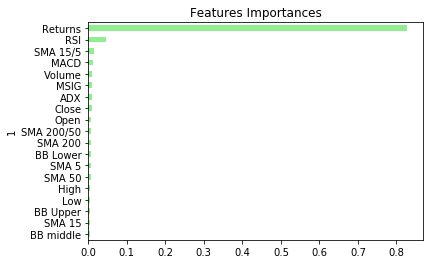

In [26]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

### Backtest/Tweak Model

### Make Predictions

### Evaluate & Plot